## Tutorial content
This tutorial will show how to use the Feed Grains open data source, provided by the USDA Economic Research Service to learn about grain production and historical effects. This tutorial will also explore grain prices in relation to production levels and determine whether there is evidence of some direct correlation, as people would expect based on supply and demand expectations. 

Before we start the tutorial though, let's just give a simple introduction to the different grain types we'll be talking about!

![barley](http://visitsteamboat.com/wp-content/uploads/2015/09/barleyburlap.jpg)
Barley: Member of the grass family, a major cereal grain. First cultivated in Eurasia around 10,000 years ago. Versatile grain that can be grown in many climates globally. Nutlike flavor and chewy. Grown for human consumption, unlike oats, it's not usually grown for animal feed, but for beer. 

![hay](http://b86170182c11f5e1da3c-7c0671222953158607ea93d5febd68b4.r44.cf1.rackcdn.com/710/assets/responsive/250000/250860/haybales.jpg)
Hay: Grass, legumes, or other assorted plants that have been cut, dried, and stored. Used as animal fodder for grazing animals like cows, horses, goats, sheep. Generally not used for human consumption, but some crazy people may eat it). One of, if not the most used feed for livestock. Easy to grow since basically anything can turn into hay. 

![corn](http://msue.anr.msu.edu/uploads/236/64694/CORN.jpg)
Corn: Also known as maize, a large grain first domesticated in southern Mexico around 10,000 years ago. It is a very popular grain, one of the most widely grown foods in the world. People eat it, but also use it for a variety of other stuff like fuel.

![oats](http://horsehealthyoats.com/images/template/oat-pile.png)
Oats: Also known as the common oat, a cereal grain that is grown for its seed. Another popular grain that is widely grown. Although suitable for human consumption, in the form of oatmeal and rolled oats, typically it is grown for livestock feed. 

![sorghum](http://dartcor.com/wp-content/uploads/2017/01/sorghum_grain_01_0.jpg)
Sorghum: A genus of flower plants, the majority of people have no idea what it is (I never heard of it until making this tutorial). Versatile crop that can be grown as a grain or sweet crop, supposedl one of the top 5 cereal crops in the world (probably not in the US though).


Now that you know what these grains are (not that it really matters), we can get started with the tutorial!

The following topics will be covered in this tutorial:  
- [Loading data](#Loading-Data)
- [Processing data](#Processing-Data)
- [Supply and use](#Supply-and-Use)
 - [Annual grain stocks](#Annual-Grain-Stocks)  
- [Prices](#Prices)
 - [Annual grain prices](#Annual-Grain-Prices)
- [Summary and references](#Summary-and-References)

Before we start, first run the lines below the import the necessary libraries. numpy will be used for numerical calculations, pandas will be used to load the data and perform the majority of parsing and data processing, matplotlib will be the used to graph the data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

## Loading Data
Now that the necessary libraries are loaded, lets load the grain data. The data will be in csv format (comma separated values), which stores comma separated values for each cell element. No manual data reading or formatting is necessary as it can be easily parsed using pandas's method *read_csv*. 

Download the *FeedGrains.zip* file from the USDA Economic Research Service website: https://www.ers.usda.gov/data-products/feed-grains-database/feed-grains-yearbook-tables.aspx. Unzip the *FeedGrains.zip* file so *FeedGrains.csv* is in a *FeedGrains* folder. There's no real reason to put it in a separate folder since it's just one file, but why not. Copy the foder into the same folder as this notebook and load the data using the below command.

In [2]:
df = pd.read_csv("FeedGrains/FeedGrains.csv")
df.head()

,SC_Group_ID,SC_Group_Desc,SC_GroupCommod_ID,SC_GroupCommod_Desc,SC_Geography_ID,SortOrder,SC_GeographyIndented_Desc,SC_Commodity_ID,SC_Commodity_Desc,SC_Attribute_ID,SC_Attribute_Desc,SC_Unit_ID,SC_Unit_Desc,Year_ID,SC_Frequency_ID,SC_Frequency_Desc,Timeperiod_ID,Timeperiod_Desc,Amount
0,2,Supply and use,9.0,Barley,1,0.8,United States,1,Barley,1,Planted acreage,2,Million acres,1926,3,Annual,69,Commodity Market Year,8.796
1,2,Supply and use,9.0,Barley,1,0.8,United States,1,Barley,1,Planted acreage,2,Million acres,1927,3,Annual,69,Commodity Market Year,9.513
2,2,Supply and use,9.0,Barley,1,0.8,United States,1,Barley,1,Planted acreage,2,Million acres,1928,3,Annual,69,Commodity Market Year,12.828
3,2,Supply and use,9.0,Barley,1,0.8,United States,1,Barley,1,Planted acreage,2,Million acres,1929,3,Annual,69,Commodity Market Year,14.703
4,2,Supply and use,9.0,Barley,1,0.8,United States,1,Barley,1,Planted acreage,2,Million acres,1930,3,Annual,69,Commodity Market Year,13.581


1 line, that's how easy it is to load a csv file using pandas! Next, we will be processing the data to make it easier to work with.

## Processing Data

As you can see, the column names are odd and meaningless without prior knowledge of the dataset. To help with that, here is a list describing what each column represents:

| Column name               | Description |
| :------------------------ | :--------- |
| SC_Group_ID               | # ID of data group       |
| SC_Group_Desc             | description of data group |
| SC_GroupCommod_ID         | # ID of commodity group |
| SC_GroupCommod_Desc       | description of commodity group |
| SC_Geography_ID           | # ID of data location |
| SortOrder                 | weighted sort order by country? unsure |
| SC_GeographyIndented_Desc | description of location |
| SC_Commodity_ID           | # ID of specific commodity type |
| SC_Commodity_Desc         | description of specific commodity type |
| SC_Attribute_ID           | # ID of data's attribute |
| SC_Attribute_Desc         | description of data's attribute  |
| SC_Unit_ID                | # ID of unit type |
| SC_Unit_Desc              | description of unit type |
| Year_ID                   | year the data represents |
| SC_Frequency_ID           | # ID of frequency data is collected |
| SC_Frequency_Desc         | description of frequency data is collected |
| Timeperiod_ID             | # ID of timeperiod the data represents |
| Timeperiod_Desc           | description of timeperiod the data represents |
| Amount                    | amount of units describing the attribute for the given commodity type |

Note that 'commodity' is asynchronous to grain for the most part. Since the data includes products such as malted barley and alcohol, which aren't grains, we will use 'commodity'. 

You probably realized that there are two columns describing each column (the ID and description). To make it easier to work with and shrink the width of the table, we will now delete all the 'duplicate' ID columns by using the code below. 


In [3]:
del df['SC_Group_ID']
del df['SC_GroupCommod_ID']
del df['SortOrder']
del df['SC_Geography_ID']
del df['SC_Commodity_ID']
del df['SC_Attribute_ID']
del df['SC_Unit_ID']
del df['SC_Frequency_ID']
del df['Timeperiod_ID']
df.head()

,SC_Group_Desc,SC_GroupCommod_Desc,SC_GeographyIndented_Desc,SC_Commodity_Desc,SC_Attribute_Desc,SC_Unit_Desc,Year_ID,SC_Frequency_Desc,Timeperiod_Desc,Amount
0,Supply and use,Barley,United States,Barley,Planted acreage,Million acres,1926,Annual,Commodity Market Year,8.796
1,Supply and use,Barley,United States,Barley,Planted acreage,Million acres,1927,Annual,Commodity Market Year,9.513
2,Supply and use,Barley,United States,Barley,Planted acreage,Million acres,1928,Annual,Commodity Market Year,12.828
3,Supply and use,Barley,United States,Barley,Planted acreage,Million acres,1929,Annual,Commodity Market Year,14.703
4,Supply and use,Barley,United States,Barley,Planted acreage,Million acres,1930,Annual,Commodity Market Year,13.581


You can see that the table is much cleaner, now that there are no more duplicate columns. Also note that you can only run the above code once on the dataframe. Running it more times will result in an error since the columns can't be found, as they have already been deleted. 

Now that we have cleared the duplicate columns, lets rename the columns to be more descriptive and intuitive for our purposes. You can use the following line to manually change the column names.


In [4]:
df.columns = ['Group', 'Commod_Group', 'Location', 'Commod', 'Attribute', 'Unit', 'Year', 'Frequency', 'Time Period', 'Amount']
print(df.shape)
df.head()

(425703, 10)


,Group,Commod_Group,Location,Commod,Attribute,Unit,Year,Frequency,Time Period,Amount
0,Supply and use,Barley,United States,Barley,Planted acreage,Million acres,1926,Annual,Commodity Market Year,8.796
1,Supply and use,Barley,United States,Barley,Planted acreage,Million acres,1927,Annual,Commodity Market Year,9.513
2,Supply and use,Barley,United States,Barley,Planted acreage,Million acres,1928,Annual,Commodity Market Year,12.828
3,Supply and use,Barley,United States,Barley,Planted acreage,Million acres,1929,Annual,Commodity Market Year,14.703
4,Supply and use,Barley,United States,Barley,Planted acreage,Million acres,1930,Annual,Commodity Market Year,13.581


This looks much more pleasing to look at than the initial table (in my opinion, you might think different, but at least the table is smaller). 

You might've noticed that there's an extra line before the table above. This is the shape of the dataframe. It consists of a tuple (# rows, # columns). There is a huge amount of data totaling to over 400,000 rows. Computers are fast enough that now they can process that amount of data relatively quickly, but we will still be extracting only the data we need. It is a good habit since the dataframe will be easier to work with after clearing out unnecessary data, as well as if working with even larger datasets in the future, say trillions of values.

For the purposes of this tutorial, we will only be looking at the data for the US, so we can begin by extracting all the rows whose *Location* is *United States*. Run the following code to achieve this.

In [5]:
df_us = df[df.Location.isin(['United States'])]
print(df_us.shape)

(40278, 10)


You can see that now the number of rows has decreased from over 400,000 to just a little over 40,000. 

We saved the new extracted dataframe into a new variable *df_us*. This way, if we still need to find something in the original dataset, we can easily reference it without having to load the data again. 

There's multiple groups that the data is categorized in. Before we can look at them, let's first sort the dataframe and find a list of unique groups.

In [6]:
df_us = df_us.sort_values(by=['Group'])
names = df_us['Group'].unique().tolist()
names

['Animal unit indexes',
 'Feed-price ratios',
 'Prices',
 'Quantities fed',
 'Supply and use',
 'Transportation']

We now have a list of unique groups in *names*. The next step before we can begin to analyze our data is to filter the dataframe again. We will achieve this  by creating 6 different dataframes, one for each data group. 

In [7]:
data = {}
for i in range(0,6):
    data[names[i]] = df_us[df_us.Group.isin([names[i]])]

Now that we have separated the data into their respective groups, we can begin analyzing and visualizing it.

## Supply and Use
We will start by looking at the *Supply and use* data group. 
Let's start by looking at the corresponding data.

In [8]:
data['Supply and use']

,Group,Commod_Group,Location,Commod,Attribute,Unit,Year,Frequency,Time Period,Amount
245518,Supply and use,Feed grains,United States,Feed grains,Beginning stocks,Million metric tons,2007,Quarterly,MMY Q2,273.864472
245519,Supply and use,Feed grains,United States,Feed grains,Beginning stocks,Million metric tons,2007,Quarterly,MMY Q3,183.268794
245520,Supply and use,Feed grains,United States,Feed grains,"Food, seed, and industrial use",Million metric tons,2006,Quarterly,MMY Q1,22.064118
245521,Supply and use,Feed grains,United States,Feed grains,"Food, seed, and industrial use",Million metric tons,2006,Quarterly,MMY Q2,22.485139
245522,Supply and use,Feed grains,United States,Feed grains,"Food, seed, and industrial use",Million metric tons,2006,Quarterly,MMY Q3,25.190198
245524,Supply and use,Feed grains,United States,Feed grains,"Food, seed, and industrial use",Million metric tons,2006,Annual,MMY AT,95.814822
245517,Supply and use,Feed grains,United States,Feed grains,Beginning stocks,Million metric tons,2007,Quarterly,MMY Q1,36.162470
245525,Supply and use,Feed grains,United States,Feed grains,"Food, seed, and industrial use",Million metric tons,2007,Quarterly,MMY Q1,26.469205
245526,Supply and use,Feed grains,United States,Feed grains,"Food, seed, and industrial use",Million metric tons,2007,Quarterly,MMY Q2,27.929693
245527,Supply and use,Feed grains,United States,Feed grains,"Food, seed, and industrial use",Million metric tons,2007,Quarterly,MMY Q3,31.656594


We can see that even within the data group, there are many other variables that we can use to try and analyze the data. Following, we will attempt to analyze and graph the data by the annual beginning stocks for grains. 

### Annual Grain Stocks
To start, let's look at annual beginning stock of each commodity. Before we can begin looking at the data, once again, we need to filter and sort the data. 

In the *Attribute* column, you can see that there are a variety of attributes. For this section, we will only be looking at *Beginning stocks*. First, lets extract only the rows whose attribute is *Beginning stocks*.


In [9]:
sau = data['Supply and use']
sau = sau[sau.Attribute.isin(['Beginning stocks'])]

You will notice that in the *Frequency* column, there are Annual and Quarterly data values. For simplicity, we will only be looking at annual values so we will extract only the rows with *Annual*.

In [10]:
sau = sau[sau.Frequency.isin(['Annual'])]

Now that we have the data we need, let's sort it by *Year* and take a look!

In [11]:
sau = sau.sort_values(by='Year')
sau.head()

,Group,Commod_Group,Location,Commod,Attribute,Unit,Year,Frequency,Time Period,Amount
233582,Supply and use,Corn,United States,Corn,Beginning stocks,Million bushels,1975,Annual,MY Sep-Aug,558.000000
238672,Supply and use,Sorghum,United States,Sorghum,Beginning stocks,Million bushels,1975,Annual,MY Sep-Aug,65.300000
233207,Supply and use,Oats,United States,Oats,Beginning stocks,Million bushels,1975,Annual,MY Jun-May,224.000000
221500,Supply and use,Barley,United States,Barley,Beginning stocks,Million bushels,1975,Annual,MY Jun-May,92.000000
245185,Supply and use,Feed grains,United States,Feed grains,Beginning stocks,Million metric tons,1975,Annual,MMY AT,21.086971


Finally, we can start to graph and visualize the data! To begin, we will make line graphs for each commodity to view the change in the amount of beginning stock for each year. Hopefully we will find some relationship!

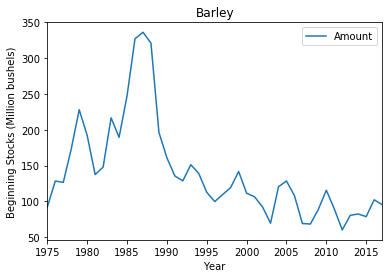

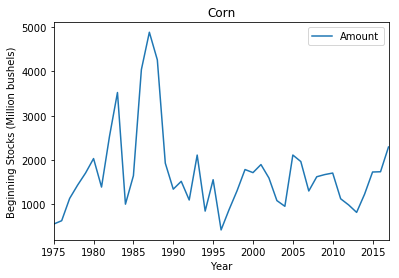

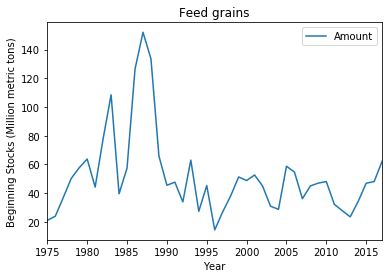

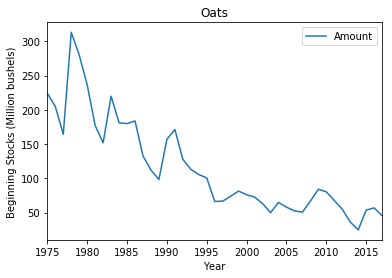

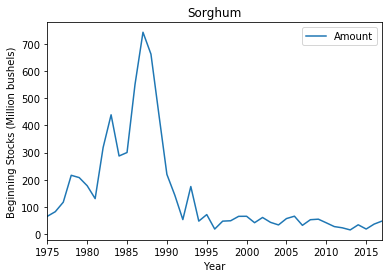

In [12]:
for i, group in sau.groupby('Commod_Group'):
    plot = group.plot(x='Year', y='Amount', title=str(i))
    y = 'Beginning Stocks (' + group.Unit.iloc[0] + ')'
    plot.set(xlabel='Year', ylabel=y)
plt.show()

Personally, I would think that the beginning stock of grains each year would be increasing, or at least have an increasing trend, due to improvements in agricultural techniques. However, it is clear based on the graphs that something happened between 1986 and 1988. One event must have led to a massive surplus in 1986, while another event must have led to a huge (deficit?) in 1988. Through a quick search on "corn supply 1986" and "corn supply 1987", I managed to find 2 articles that explain the phenomena. 

http://agfax.com/2016/11/29/grain-market-reminded-of-1986-king-daddy-year-of-corn-stocks-dtn/  
The article in the link above describes how there were "four consecutive years of good crop weather" which led to not only the US, but the entire world to have excess grain supplies. Only about 66% of corn stock was used, explaining the massive surplus in the time period.

http://articles.latimes.com/1988-07-13/business/fi-5672_1_food-prices  
This article compares the staggering grain production in 1988 compared to 1987. There seems to have been a severe drought that would kill off an estimated 30%-45% of projected harvest. As a result, the surplus that built up the past years must have been depleted in an instant, over the following years of bad weather. 

Based on this, it seems that weather has a much greater effect on grain supply than agricultural techniques. However, this correlation can't be concluded without looking at weather data and trying to find a relation between the two datasets. We won't be looking at that today since this is a tutorial to get started in looking at grain data. Instead, we will explore more subsets of data in *FeedGrains.csv*, specifically prices!

## Prices

### Annual Grain Prices
Just looking at one correlation of data is no fun since finding a relation is so simple. Next, let's take a look at the prices of the grains above! We will begin by looking at annual grain prices and graph the data to see if we can find a basic visual correlation.

Prices won't be found in the *Supply and use* group, so we will be looking at the *Prices* data group for this part. 

In [13]:
data['Prices'].head()

,Group,Commod_Group,Location,Commod,Attribute,Unit,Year,Frequency,Time Period,Amount
243657,Prices,Hay,United States,Hay all (dry),Prices received by farmers,Dollars per ton,2001,Monthly,Dec,95.600
243676,Prices,Corn,United States,Corn grain,Prices received by farmers,Dollars per bushel,1957,Monthly,Oct,1.060
243677,Prices,Corn,United States,Corn grain,Prices received by farmers,Dollars per bushel,1957,Monthly,Nov,0.985
243678,Prices,Corn,United States,Corn grain,Prices received by farmers,Dollars per bushel,1957,Monthly,Dec,0.984
243679,Prices,Corn,United States,Corn grain,Prices received by farmers,Dollars per bushel,1957,Annual,Commodity Market Year,1.110


Similar to the *Supply and use* data group, *Prices* also has a variety of information. Once again, we will start by working to filter out unnecessary data. 

Let's start by sorting the data by year and see where to go from there.

In [14]:
p = data['Prices']
p = p.sort_values(by='Year')
p

,Group,Commod_Group,Location,Commod,Attribute,Unit,Year,Frequency,Time Period,Amount
230364,Prices,Oats,United States,Oats,Prices received by farmers,Dollars per bushel,1866,Annual,Commodity Market Year,0.474000
242108,Prices,Corn,United States,Corn grain,Prices received by farmers,Dollars per bushel,1866,Annual,Commodity Market Year,0.657000
228563,Prices,Corn,United States,Corn,Prices received by farmers,Dollars per bushel,1866,Annual,Commodity Market Year,0.657000
596,Prices,Barley,United States,Barley,Prices received by farmers,Dollars per bushel,1866,Annual,Commodity Market Year,0.952000
241469,Prices,Hay,United States,Hay all (dry),Prices received by farmers,Dollars per ton,1866,Annual,Commodity Market Year,14.480000
230365,Prices,Oats,United States,Oats,Prices received by farmers,Dollars per bushel,1867,Annual,Commodity Market Year,0.587000
242109,Prices,Corn,United States,Corn grain,Prices received by farmers,Dollars per bushel,1867,Annual,Commodity Market Year,0.781000
228564,Prices,Corn,United States,Corn,Prices received by farmers,Dollars per bushel,1867,Annual,Commodity Market Year,0.781000
597,Prices,Barley,United States,Barley,Prices received by farmers,Dollars per bushel,1867,Annual,Commodity Market Year,1.220000
241470,Prices,Hay,United States,Hay all (dry),Prices received by farmers,Dollars per ton,1867,Annual,Commodity Market Year,14.300000


Once again, we can see that there is detailed data for each quarter of the year or each month, but for simplicity, we will again, be looking at annual prices. This consistency with the annual grain stocks data will also allow us to easily perform a comparison. Let's now extract only the annual data...

In [15]:
p = p[p.Frequency.isin(['Annual'])]
p

,Group,Commod_Group,Location,Commod,Attribute,Unit,Year,Frequency,Time Period,Amount
230364,Prices,Oats,United States,Oats,Prices received by farmers,Dollars per bushel,1866,Annual,Commodity Market Year,0.474000
242108,Prices,Corn,United States,Corn grain,Prices received by farmers,Dollars per bushel,1866,Annual,Commodity Market Year,0.657000
228563,Prices,Corn,United States,Corn,Prices received by farmers,Dollars per bushel,1866,Annual,Commodity Market Year,0.657000
596,Prices,Barley,United States,Barley,Prices received by farmers,Dollars per bushel,1866,Annual,Commodity Market Year,0.952000
241469,Prices,Hay,United States,Hay all (dry),Prices received by farmers,Dollars per ton,1866,Annual,Commodity Market Year,14.480000
230365,Prices,Oats,United States,Oats,Prices received by farmers,Dollars per bushel,1867,Annual,Commodity Market Year,0.587000
242109,Prices,Corn,United States,Corn grain,Prices received by farmers,Dollars per bushel,1867,Annual,Commodity Market Year,0.781000
228564,Prices,Corn,United States,Corn,Prices received by farmers,Dollars per bushel,1867,Annual,Commodity Market Year,0.781000
597,Prices,Barley,United States,Barley,Prices received by farmers,Dollars per bushel,1867,Annual,Commodity Market Year,1.220000
241470,Prices,Hay,United States,Hay all (dry),Prices received by farmers,Dollars per ton,1867,Annual,Commodity Market Year,14.300000


You may have noticed that there is some difference between the two datasets, the *Prices* dataset has a *Hay* group, while the *Supply and use* dataset has *Feed grains*. These two seem to be the same group of data, considering that hay is used as a feed grain for animals (most people choose not to eat hay and instead, eat oats, sorghum, barley, and corn). Before we come to this conclusion, let's take a look at what groups are in the *Prices* datasets.

In [16]:
p['Commod_Group'].unique().tolist()

['Oats', 'Corn', 'Barley', 'Hay', 'Sorghum']

Just like the *Supply and use* dataset, there are 5 groups, so we will be assuming that *Hay* corresponds to *Feed grains*. 

You probably also noticed that the commodities in *Prices* differs from the group, as compared to the *Supply and use* dataset. Although there are many different types of specific grains and farmers are paid different prices depending on the specific product being made from their produce, we will be looking at the grain groups as a whole so it will be easier to compare. 

Next, we see that there are newer attributes in recent years, distinguishing between farmers' pay on the high end, low end, and average. We will take only the average pay rate in order to maximize the data we can use (early years don't distinguish between high and low end). We can extract only the average prices with:

In [17]:
p = p[p.Attribute.isin(['Prices received by farmers'])]
p

,Group,Commod_Group,Location,Commod,Attribute,Unit,Year,Frequency,Time Period,Amount
230364,Prices,Oats,United States,Oats,Prices received by farmers,Dollars per bushel,1866,Annual,Commodity Market Year,0.474000
242108,Prices,Corn,United States,Corn grain,Prices received by farmers,Dollars per bushel,1866,Annual,Commodity Market Year,0.657000
228563,Prices,Corn,United States,Corn,Prices received by farmers,Dollars per bushel,1866,Annual,Commodity Market Year,0.657000
596,Prices,Barley,United States,Barley,Prices received by farmers,Dollars per bushel,1866,Annual,Commodity Market Year,0.952000
241469,Prices,Hay,United States,Hay all (dry),Prices received by farmers,Dollars per ton,1866,Annual,Commodity Market Year,14.480000
230365,Prices,Oats,United States,Oats,Prices received by farmers,Dollars per bushel,1867,Annual,Commodity Market Year,0.587000
242109,Prices,Corn,United States,Corn grain,Prices received by farmers,Dollars per bushel,1867,Annual,Commodity Market Year,0.781000
228564,Prices,Corn,United States,Corn,Prices received by farmers,Dollars per bushel,1867,Annual,Commodity Market Year,0.781000
597,Prices,Barley,United States,Barley,Prices received by farmers,Dollars per bushel,1867,Annual,Commodity Market Year,1.220000
241470,Prices,Hay,United States,Hay all (dry),Prices received by farmers,Dollars per ton,1867,Annual,Commodity Market Year,14.300000


After filtering some more data, we can see that there are some more issues with data consistency. Sorghum is listed under two types of units, *Dollars per bushel* and *Dollars per cwt*. We will only be looking at *Dollars per bushel* so next, we will remove those sets of data. The code below is slightly different from previous methods of extraction, because instead of extracting data with a certain value, we will extract data that doesn't contain a certain value, effectively removing the unwanted data.

In [18]:
p = p[p.Unit != 'Dollars per cwt']
p

,Group,Commod_Group,Location,Commod,Attribute,Unit,Year,Frequency,Time Period,Amount
230364,Prices,Oats,United States,Oats,Prices received by farmers,Dollars per bushel,1866,Annual,Commodity Market Year,0.4740
242108,Prices,Corn,United States,Corn grain,Prices received by farmers,Dollars per bushel,1866,Annual,Commodity Market Year,0.6570
228563,Prices,Corn,United States,Corn,Prices received by farmers,Dollars per bushel,1866,Annual,Commodity Market Year,0.6570
596,Prices,Barley,United States,Barley,Prices received by farmers,Dollars per bushel,1866,Annual,Commodity Market Year,0.9520
241469,Prices,Hay,United States,Hay all (dry),Prices received by farmers,Dollars per ton,1866,Annual,Commodity Market Year,14.4800
230365,Prices,Oats,United States,Oats,Prices received by farmers,Dollars per bushel,1867,Annual,Commodity Market Year,0.5870
242109,Prices,Corn,United States,Corn grain,Prices received by farmers,Dollars per bushel,1867,Annual,Commodity Market Year,0.7810
228564,Prices,Corn,United States,Corn,Prices received by farmers,Dollars per bushel,1867,Annual,Commodity Market Year,0.7810
597,Prices,Barley,United States,Barley,Prices received by farmers,Dollars per bushel,1867,Annual,Commodity Market Year,1.2200
241470,Prices,Hay,United States,Hay all (dry),Prices received by farmers,Dollars per ton,1867,Annual,Commodity Market Year,14.3000


There doesn't seem to be any more data inconsistencies so we can finally begin to graph the data. We will be graphing based on *Commod* this time instead of *Commod_Group* since *Commod* is more consistent. Hopefully we can find some trends!

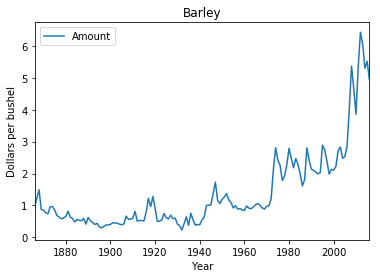

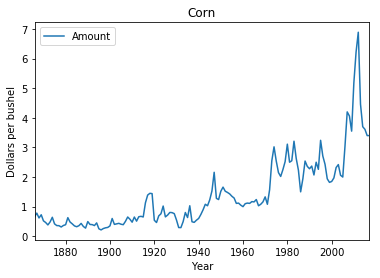

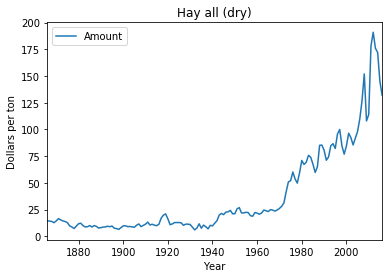

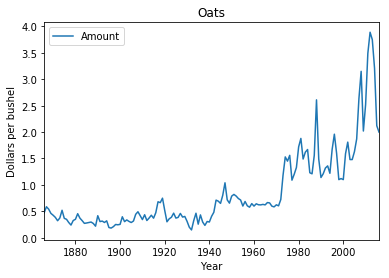

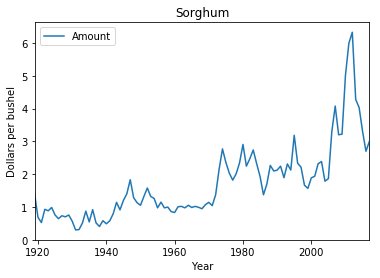

In [19]:
for i, group in p.groupby('Commod'):
    if i == 'Corn' or i == 'Hay all (dry)' or i == 'Barley' or i == 'Oats' or i == 'Sorghum':
        plot = group.plot(x='Year', y='Amount', title=str(i))
        plot.set(xlabel='Year', ylabel=group.Unit.iloc[0])
plt.show()

We can see that there is inconsistency in the start years for the datasets, so we will set a x-limit so it will be easier to compare the datasets. 

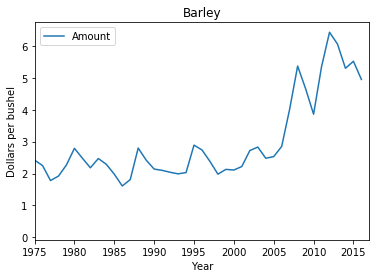

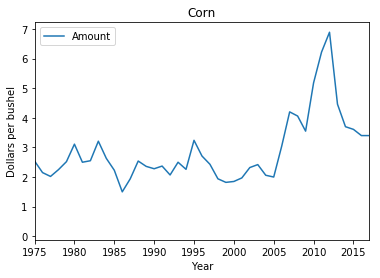

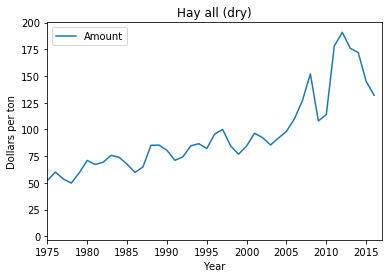

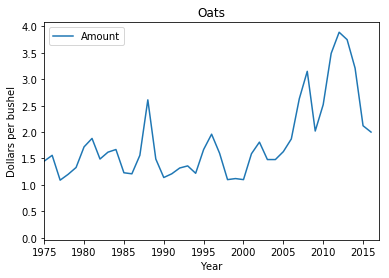

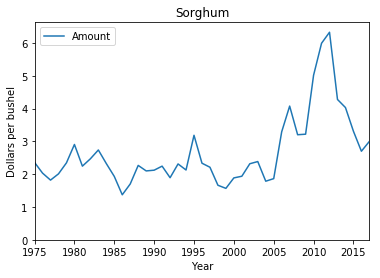

In [20]:
for i, group in p.groupby('Commod'):
    if i == 'Corn' or i == 'Hay all (dry)' or i == 'Barley' or i == 'Oats' or i == 'Sorghum':
        plot = group.plot(x='Year', y='Amount', title=str(i), xlim=(1975, 2017))
        plot.set(xlabel='Year', ylabel=group.Unit.iloc[0])
plt.show()

Simply looking at the data, there appears to be no relation between stock and prices whatsoever. The most clear indicators are how there's a spike in grain stock around 1987, but there is no defined change in prices during that time period. Prices also spiked around 2012, but there appears to have been no change in average grain stock during that time period. 

Through some research, it seems that since around 2010, there has been severe weather conditions such as droughts in the US causing a deficit in the supply (although it seems to look consistent based on the data). Supposedly this is the reason for a raise in price, despite the fact that the data on our grain supply seems to differ. 

The resulting conclusion seems to imply that regardless of the weather and grain supply, it will not have a severe impact on the price of grain, at least in the short term. Although this seems trivial, this does impact virtually everyone. Whether there is another reason that prices are high despite our consistent supply, or demand has simply increased beyond past years, resulting in a higher necessary grain supply, numbers tell more truth than a news article.

Note: for grader  
After coming this far, I could not think of a way to incorporate machine learning usefully into this dataset without either choosing a completely different dataset or different subset of data. I initially expected there to be data for other countries as well so a linear regression line would be useful in determining the global trend of price and supply and determine if there is a relation be comparing the regression lines, but the only data in the dataset is for the US. 

## Summary and References

This tutorial has looked at the changes in grain supply, as well as grain prices over the time period of 1975 to 2016. Through graphical evidence, there does not seem to be any evidence of a correlation between grain price and supply, no matter how much surplus or deficit there is. There may be a correlation with the economy or weather between the two datasets, but that was not explored in this tutorial.

In conclusion, there are many things that data science can accomplish in any field. New patterns or unexpected trends may be found that were unseen before. With these patterns and unexpected trends, further research and data application can be applied to determine correlations between data. Although correlation does not imply causation, new discoveries may be found that initiate new ideas, especially considering the sheer amount of data, even for something (seemingly simple) like grains.

Data source: https://www.ers.usda.gov/data-products/feed-grains-database/feed-grains-yearbook-tables.aspx
